for beacon 0:1 min distance:  0.5623413251903491  and max distance:  1.7782794100389228


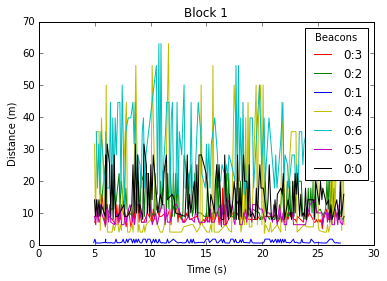

for beacon 0:1 min distance:  1.9952623149688795  and max distance:  4.466835921509632


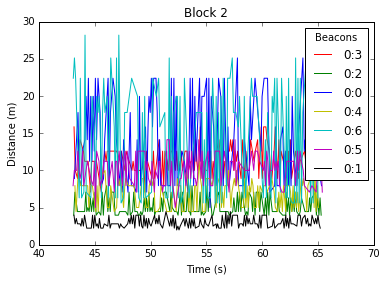

for beacon 0:1 min distance:  2.8183829312644537  and max distance:  17.78279410038923


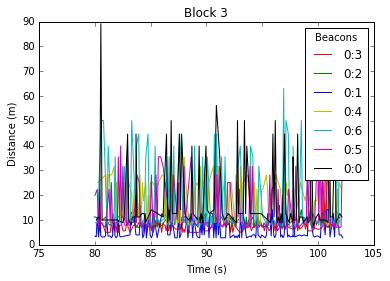

for beacon 0:1 min distance:  3.1622776601683795  and max distance:  17.78279410038923


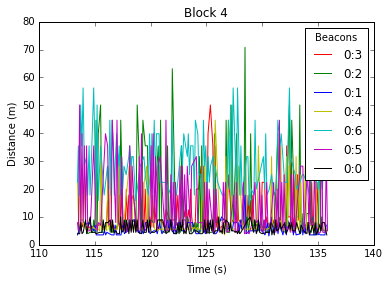

for beacon 0:1 min distance:  4.466835921509632  and max distance:  22.3872113856834


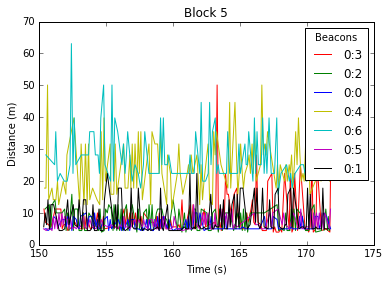

for beacon 0:1 min distance:  3.9810717055349722  and max distance:  25.118864315095795


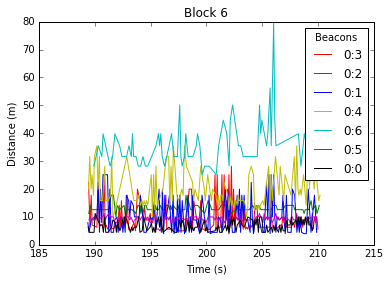

for beacon 0:1 min distance:  6.309573444801933  and max distance:  28.183829312644534


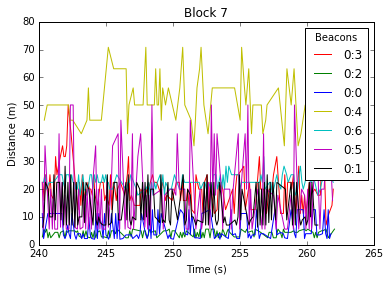

for beacon 0:1 min distance:  6.309573444801933  and max distance:  89.12509381337455


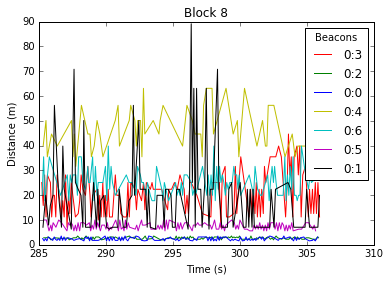

for beacon 0:1 min distance:  4.466835921509632  and max distance:  25.118864315095795


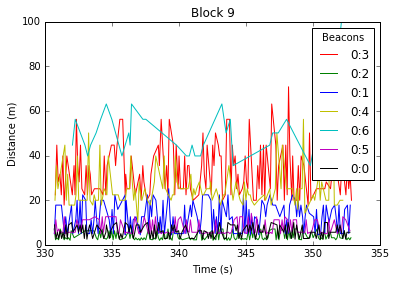

for beacon 0:1 min distance:  5.011872336272722  and max distance:  56.23413251903491


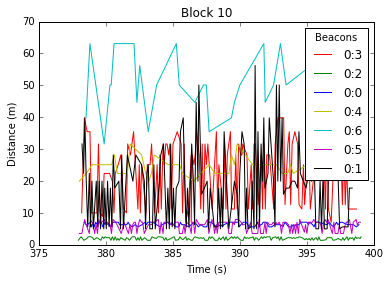

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import itertools

class Data(object):  # each data object contains a time and rssi value
    
    def __init__(self):
        self.time = 0
        self.distance = 0
        self.rssi = 0

begin = False
blockNum = 1  # start off at 1
beaconNum = "0:0"
allBeacons = {}  # dictionary of every beacon in a block

def plotBlock(block):
    global allBeacons
    x = []  # time
    y = []  # rssi
    z = []  # distance
    colors = itertools.cycle(["r", "g", "b", "y", "c", "m", "k"])
    get_ipython().magic('matplotlib inline')
    for currBeacon in allBeacons:  # loop thru each beacon
        for i in range(0, len(allBeacons[currBeacon])-1):  # loop thru each Data object in currBeacon
            x.append(allBeacons[currBeacon][i].time)
            y.append(allBeacons[currBeacon][i].rssi)
            z.append(allBeacons[currBeacon][i].distance)
        plt.plot(x, z, linestyle='-', label=currBeacon, color=next(colors))
        if currBeacon == "0:1":
            print("for beacon 0:1 min distance: ", min(z), " and max distance: ", max(z))
        x.clear()  # reset x array for next beacon
        y.clear()  # reset y array for next beacon
        z.clear()
    # format plot
    plt.title("Block " + str(block))
    plt.xlabel("Time (s)")
    plt.ylabel("Distance (m)")
    plt.legend(title="Beacons")
    plt.show()  

def main():
    global begin
    global blockNum
    global beaconNum
    global allBeacons
    
    first = True
    begin = False

    f = open("2_6_2016_1441.txt")  # open text file
    for line in f:
        words = line.split()
        time = int(words[0])  # get time
        if first == True:
            initial_time = time  # set base time
            first = False
        time = (time - initial_time) / 1000  # get elapsed time in seconds
        parsed_json = json.loads(words[1])  # parse json
        if parsed_json.get('marker'):  # check if marker
            if (parsed_json['marker'] == 'begin\n'):
                begin = True  # begin block
            elif (parsed_json.get('marker') == 'end\n'):
                oldBegin = begin
                begin = False  # end block
                if (oldBegin == True):  # ensures that we have reached the first end after a begin
                    plotBlock(blockNum)
                blockNum += 1  # increment which block number we are on
                allBeacons.clear()  # resets allBeacons dictionary for next block
        elif parsed_json.get('node') and begin == True:  # check if node and if in block
            beaconNum = str(parsed_json['major']) + ":" + str(parsed_json['minor'])  # beacon identified by major and minor
            rssi = parsed_json['rssi']
            distance = 10**((rssi+60)/-20)  # log-distance pathloss model
            allBeacons.setdefault(beaconNum, []).append(Data())  # each beacon has an array of Data
            dataPos = len(allBeacons[beaconNum])  # number of Data objects a specific beaconNum has
            allBeacons[beaconNum][dataPos - 1].time = time  # dataPos - 1 = position in array
            allBeacons[beaconNum][dataPos - 1].distance = distance
            allBeacons[beaconNum][dataPos - 1].rssi = rssi
    
    f.close()  # close file
        
if __name__ == "__main__":
    main()